# Problem

The maze problem is one where we are given an input .txt file of all the edges in the maze with a format as follows:

```
n      ## Final point to reach
a b d  ## index of first point, index of second point, direction in which they are connected
a b d
a b d
...
```

We are also given that the starting point is index 0 and the desired end point is the last index. We must determine the shortest path from start to end given that we can only movements in a specific direction and then move three vertices in that direction.

# Approach

We begin by first creating the graph of all the vertices. From there, we can create another graph taking into consideration our movement ability. Then we determine the minimum spanning tree on the latter graph and find the shortest path from start to end.

In [178]:
import networkx as nx
import matplotlib.pyplot as plt

def generateGraph(fileName):
    G = nx.DiGraph()
    f = open(fileName, 'r')
    lines = f.readlines()
    finalPoint = int(lines[0])
    for line in lines[1:]:
        l = line.split()
        a = int(l[0])
        b = int(l[1])
        d = l[2]
        G.add_edge(a,b)
        G[a][b]['direction'] = d
        
    return G, finalPoint


The graph has 93 nodes and 118 edges


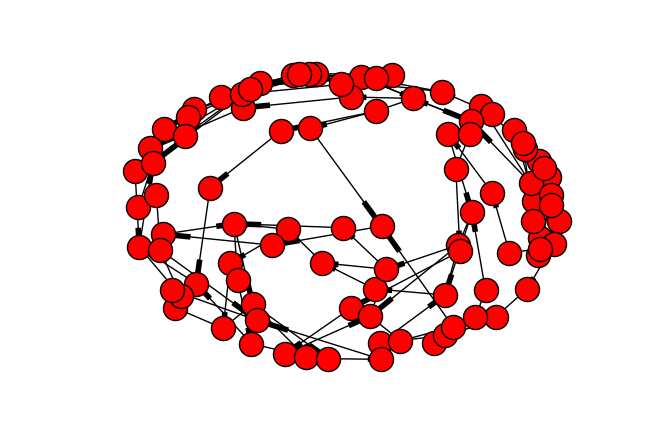

In [179]:
G, finalPoint = generateGraph('spiderMaze.txt')
print("The graph has {} nodes and {} edges".format(G.number_of_nodes(), G.number_of_edges()))
nx.draw(G)
plt.show()

In [180]:
G.nodes()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92]

In [181]:
G.edges()

[(0, 1),
 (1, 2),
 (1, 12),
 (2, 3),
 (3, 4),
 (3, 14),
 (3, 15),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 16),
 (10, 11),
 (11, 18),
 (12, 19),
 (13, 19),
 (14, 13),
 (15, 20),
 (16, 17),
 (17, 27),
 (18, 28),
 (19, 29),
 (20, 21),
 (20, 30),
 (21, 22),
 (22, 23),
 (23, 24),
 (24, 25),
 (25, 26),
 (26, 27),
 (27, 28),
 (27, 31),
 (28, 32),
 (28, 31),
 (29, 33),
 (29, 34),
 (30, 35),
 (31, 41),
 (31, 42),
 (32, 43),
 (33, 34),
 (33, 44),
 (34, 35),
 (34, 45),
 (35, 36),
 (35, 45),
 (36, 37),
 (37, 38),
 (38, 39),
 (39, 40),
 (40, 41),
 (41, 42),
 (41, 46),
 (42, 48),
 (42, 43),
 (43, 49),
 (44, 50),
 (45, 51),
 (45, 52),
 (46, 47),
 (47, 54),
 (48, 57),
 (49, 57),
 (49, 58),
 (50, 59),
 (51, 60),
 (52, 53),
 (52, 61),
 (53, 54),
 (54, 55),
 (55, 56),
 (56, 57),
 (57, 68),
 (57, 62),
 (58, 69),
 (59, 63),
 (60, 64),
 (61, 65),
 (62, 66),
 (63, 74),
 (63, 70),
 (64, 76),
 (65, 71),
 (66, 67),
 (66, 71),
 (67, 68),
 (68, 72),
 (68, 69),
 (69, 73),
 (70, 76),
 (71, 80),

In [182]:
G[0]

{1: {'direction': 'E'}}

In [183]:
G.neighbors(0)

[1]

In [184]:
def getNeighborWithDirection(g,point,direction):
    if point != -1:
        for n in g.neighbors(point):
            if g[point][n]['direction'] == direction:
                return n
    return -1


def getNInDirectionFrom(g,n,d,start):
    counter = 0
    currentPoint = start
    while counter < n:
        currentPoint = getNeighborWithDirection(g,currentPoint, d)
        counter+= 1
    return currentPoint

def bfs(g,p,start, moves):
    points = []
    for point in start:
        if point != -1:
            neighbors = g.neighbors(point)
            for n in neighbors:
                direction = g[point][n]['direction']
                nextPoint = getNInDirectionFrom(g,moves,direction,point)
                if nextPoint != -1:
                    points.append(nextPoint)
                    p.add_edge(point,nextPoint)
    return p, points

def generatePossible(g,moves):
    p = nx.DiGraph()
    nextPoints = [0]
    while nextPoints != [] and nextPoints != [-1]:
        p, nextPoints = bfs(g,p,nextPoints,moves)
        nextPoints = list(set(nextPoints))

    return p

The graph has 14 nodes and 13 edges


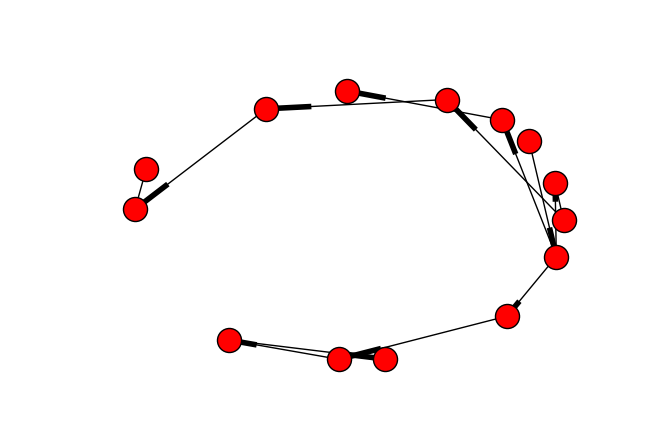

In [185]:
P = generatePossible(G,3)
print("The graph has {} nodes and {} edges".format(P.number_of_nodes(), P.number_of_edges()))
nx.draw(P)
plt.show()

In [186]:
P.nodes()

[0, 51, 3, 6, 9, 44, 79, 76, 19, 85, 88, 91, 30, 63]

In [187]:
P.edges()

[(0, 3),
 (51, 76),
 (3, 19),
 (3, 30),
 (3, 6),
 (6, 9),
 (44, 63),
 (76, 79),
 (19, 44),
 (85, 88),
 (88, 91),
 (30, 51),
 (63, 85)]

In [188]:
if finalPoint not in P.nodes():
    print("This problem can not be solved under the selected constraints.")
else:
    print("Below is the shortest path from the starting point to the final point")
    sp = nx.shortest_path(P,min(P.nodes()),max(P.nodes()))
    print()


This problem can not be solved under the selected constraints.
Below is the shortest path from the minimum point to the maximum point


[0, 3, 19, 44, 63, 85, 88, 91]